In [0]:
%pip install geopandas
%pip install shapely
%pip install fsspec
%pip install s3fs
%pip install rtree


Python interpreter will be restarted.
Collecting geopandas
 Downloading geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
Collecting fiona>=1.8
 Downloading Fiona-1.8.21-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.6 MB)
Collecting shapely>=1.6
 Downloading Shapely-1.8.1.post1-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.1 MB)
Collecting pyproj>=2.2.0
 Downloading pyproj-3.3.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (5.8 MB)
Requirement already satisfied: pandas>=0.25.0 in /databricks/python3/lib/python3.8/site-packages (from geopandas) (1.2.4)
Requirement already satisfied: six>=1.7 in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (1.15.0)
Requirement already satisfied: setuptools in /usr/local/lib/python3.8/dist-packages (from fiona>=1.8->geopandas) (52.0.0)
Collecting click>=4.0
 Downloading click-8.0.4-py3-none-any.whl (97 kB)
Requirement already satisfied: certifi in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (2020.12.5)
Collecting munch
 Downloading munch-2.5.0-py2.py3-none-any.whl (10 kB)
Collecting cligj>=0.5
 Downloading cligj-0.7.2-py3-none-any.whl (7.1 kB)
Collecting click-plugins>=1.0
 Downloading click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
Requirement already satisfied: attrs>=17 in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8->geopandas) (20.3.0)
Requirement already satisfied: pytz>=2017.3 in /databricks/python3/lib/python3.8/site-packages (from pandas>=0.25.0->geopandas) (2020.5)
Requirement already satisfied: numpy>=1.16.5 in /databricks/python3/lib/python3.8/site-packages (from pandas>=0.25.0->geopandas) (1.19.2)
Requirement already satisfied: python-dateutil>=2.7.3 in /databricks/python3/lib/python3.8/site-packages (from pandas>=0.25.0->geopandas) (2.8.1)
Installing collected packages: click, munch, cligj, click-plugins, shapely, pyproj, fiona, geopandas
Successfully installed click-8.0.4 click-plugins-1.1.1 cligj-0.7.2 fiona-1.8.21 geopandas-0.10.2 munch-2.5.0 pyproj-3.3.0 shapely-1.8.1.post1
WARNING: You are using pip version 21.0.1; however, version 22.0.4 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-decf9cb5-6f6b-4681-b175-3805a887bd00/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.
Python interpreter will be restarted.
Requirement already satisfied: shapely in /local_disk0/.ephemeral_nfs/envs/pythonEnv-decf9cb5-6f6b-4681-b175-3805a887bd00/lib/python3.8/site-packages (1.8.1.post1)
WARNING: You are using pip version 21.0.1; however, version 22.0.4 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-decf9cb5-6f6b-4681-b175-3805a887bd00/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.
Python interpreter will be restarted.
Collecting fsspec
 Downloading fsspec-2022.2.0-py3-none-any.whl (134 kB)
Installing collected packages: fsspec
Successfully installed fsspec-2022.2.0
WARNING: You are using pip version 21.0.1; however, version 22.0.4 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-decf9cb5-6f6b-4681-b175-3805a887bd00/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.
Python interpreter will be restarted.
Collecting s3fs
 Downloading s3fs-2022.2.0-py3-none-any.whl (26 kB)
Requirement already satisfied: fsspec==2022.02.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-decf9cb5-6f6b-4681-b175-3805a887bd00/lib/python3.8/site-packages (from s3fs) (2022.2.0)
Collecting aiobotocore~=2.1.0
 Downloading aiobotocore-2.1.2.tar.gz (58 kB)
Collecting aiohttp<=4
 Downloading aiohttp-3.8.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.3 MB)
Collecting botocore<1.23.25,>=1.23.24
 Downloading botocore-1.23.24-py3-none-any.whl (8.4 MB)
Collecting wrapt>=1.10.10
 Downloading wrapt-1.14.0-

In [0]:
import pandas as pd
from geopandas import GeoDataFrame , sjoin
from shapely.geometry import Point, Polygon
from shapely import wkt
import fiona

geopandas.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'


In [0]:
# # Create Points as geometry column
# gps_pandas_df = pd.read_csv("s3a://train-data-20221903/sample_data/*" , compression='gzip')
# gps_pandas_df['utc_timestamp'] = pd.to_datetime(gps_pandas_df['utc_timestamp'], unit='ms', utc=True).dt.date
# gps_pandas_df = gps_pandas_df.rename(columns={"Unnamed: 0": "row_id", "lat": "latitude", "lon" : "longitude", "utc_timestamp":"date"})
# gps_pandas_df['geometry'] = gps_pandas_df.apply(lambda x : Point(x.longitude , x.latitude) , axis=1)

# # Create geopandas dataframe object 
# df_crs = { 'init' : 'epsg:4326'}
# gps_geopandas_df = GeoDataFrame(gps_pandas_df , crs = df_crs, geometry = gps_pandas_df.geometry )

# display(gps_geopandas_df)

In [0]:
# Create Points as geometry column
gps_pandas_df = pd.read_csv("s3a://train-data-20221903/train_data/ full_signals/full_data/*" , compression='gzip')
gps_pandas_df['utc_timestamp'] = pd.to_datetime(gps_pandas_df['utc_timestamp'], unit='ms', utc=True).dt.date
gps_pandas_df = gps_pandas_df.rename(columns={"Unnamed: 0": "row_id", "lat": "latitude", "lon" : "longitude", "utc_timestamp":"date"})
gps_pandas_df['geometry'] = gps_pandas_df.apply(lambda x : Point(x.longitude , x.latitude) , axis=1)

# Create geopandas dataframe object 
df_crs = { 'init' : 'epsg:4326'}
gps_geopandas_df = GeoDataFrame(gps_pandas_df , crs = df_crs, geometry = gps_pandas_df.geometry )

display(gps_geopandas_df)

/local_disk0/.ephemeral_nfs/envs/pythonEnv-decf9cb5-6f6b-4681-b175-3805a887bd00/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
 in_crs_string = _prepare_from_proj_string(in_crs_string)

,row_id,device_id,latitude,longitude,date,geometry
0,392776,9383,52.432620,13.346960,2021-01-01,POINT (13.34696 52.43262)
1,773985,18417,52.393370,13.409240,2021-01-01,POINT (13.40924 52.39337)
2,994843,23809,52.497509,13.307560,2021-01-01,POINT (13.30756 52.49751)
3,522358,12470,52.542806,13.569609,2021-01-01,POINT (13.56961 52.54281)
4,362820,8763,52.451360,13.255370,2021-01-01,POINT (13.25537 52.45136)
...,...,...,...,...,...,...
999995,933757,22324,52.472780,13.450064,2021-01-01,POINT (13.45006 52.47278)
999996,82888,1931,52.574231,13.497103,2021-01-01,POINT (13.49710 52.57423)
999997,946471,22625,52.498166,13.408628,2021-01-01,POINT (13.40863 52.49817)
999998,4762,138,52.413950,13.395710,2021-01-01,POINT (13.39571 52.41395)


In [0]:
stores_pandas_df = pd.read_csv("s3a://train-data-20221903/train_data/stores.csv")
stores_pandas_df['geometry'] = stores_pandas_df['wkt'].apply(wkt.loads)
stores_pandas_df.drop('wkt', axis=1, inplace=True)


stores_geopandas_df = GeoDataFrame(stores_pandas_df , crs = df_crs, geometry = stores_pandas_df.geometry)

display(stores_geopandas_df)

/local_disk0/.ephemeral_nfs/envs/pythonEnv-decf9cb5-6f6b-4681-b175-3805a887bd00/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
 in_crs_string = _prepare_from_proj_string(in_crs_string)

,store_id,store_name,geometry
0,place_1,McDonald's,"POLYGON ((13.46119 52.47099, 13.46103 52.47066..."
1,place_2,McDonald's,"POLYGON ((13.46835 52.54716, 13.46841 52.54716..."
2,place_3,McDonald's,"POLYGON ((13.31288 52.41979, 13.31303 52.41966..."
3,place_4,McDonald's,"POLYGON ((13.36358 52.56060, 13.36358 52.56061..."
4,place_5,McDonald's,"POLYGON ((13.32309 52.56135, 13.32307 52.56128..."
...,...,...,...
242,place_243,Renault,"POLYGON ((13.36861 52.48311, 13.36833 52.48317..."
243,place_244,Renault,"POLYGON ((13.28639 52.51647, 13.28640 52.51637..."
244,place_245,Lexus,"POLYGON ((13.51983 52.52653, 13.52021 52.52654..."
245,place_246,Sparkasse,"POLYGON ((13.53892 52.67664, 13.53866 52.67654..."


In [0]:
devices_within_stores = gps_geopandas_df.sjoin(stores_geopandas_df , predicate = 'within')
device_store_time = devices_within_stores[["date","store_name", "store_id","device_id"]]

display(device_store_time)

date,store_name,store_id,device_id
2021-01-01,McDonald's,place_25,6790
2021-01-01,McDonald's,place_25,6790
2021-01-01,McDonald's,place_25,6790
2021-01-01,McDonald's,place_25,9288
2021-01-01,McDonald's,place_25,6790
2021-01-01,McDonald's,place_25,6790
2021-01-01,McDonald's,place_25,6790
2021-01-01,McDonald's,place_25,6790
2021-01-01,McDonald's,place_25,6790
2021-01-01,McDonald's,place_25,6790


In [0]:
affinities_path = 's3a://train-data-20221903/train_data/affinities/'

affinities_dict = dbutils.fs.ls(f'{affinities_path}')
affinities_name_path = { fileinfo.name.split('.')[0] : fileinfo.path for fileinfo in affinities_dict  }


In [0]:
merge_df = device_store_time

for file_name in affinities_name_path : 
  affinity_df = pd.read_csv(affinities_name_path[file_name])
  affinity_df.columns = [file_name, 'device_id']
  affinity_df[file_name] = affinity_df['device_id']

  merge_df = merge_df.merge(affinity_df, on='device_id', how='left')
  

display(merge_df)

date,store_name,store_id,device_id,addidas,apple,bmw,employed,female,h_&_m,high_income,honda,job_seeking,low_income,male,mercedes-benz,middle_income,retired,student,tommy_helfinger
2021-01-01,McDonald's,place_25,6790,null,6790.0,null,null,null,null,null,null,null,6790.0,6790,null,null,null,null,null
2021-01-01,McDonald's,place_25,6790,null,6790.0,null,null,null,null,null,null,null,6790.0,6790,null,null,null,null,null
2021-01-01,McDonald's,place_25,6790,null,6790.0,null,null,null,null,null,null,null,6790.0,6790,null,null,null,null,null
2021-01-01,McDonald's,place_25,9288,null,null,null,null,null,null,null,null,null,null,9288,null,9288.0,null,null,null
2021-01-01,McDonald's,place_25,6790,null,6790.0,null,null,null,null,null,null,null,6790.0,6790,null,null,null,null,null
2021-01-01,McDonald's,place_25,6790,null,6790.0,null,null,null,null,null,null,null,6790.0,6790,null,null,null,null,null
2021-01-01,McDonald's,place_25,6790,null,6790.0,null,null,null,null,null,null,null,6790.0,6790,null,null,null,null,null
2021-01-01,McDonald's,place_25,6790,null,6790.0,null,null,null,null,null,null,null,6790.0,6790,null,null,null,null,null
2021-01-01,McDonald's,place_25,6790,null,6790.0,null,null,null,null,null,null,null,6790.0,6790,null,null,null,null,null
2021-01-01,McDonald's,place_25,6790,null,6790.0,null,null,null,null,null,null,null,6790.0,6790,null,null,null,null,null


In [0]:
# Creation of group by dataframe 
merge_df_group = merge_df.groupby(["date","store_name", "store_id"])

# Aggregation of columns for count of unique visitors 
merge_df_nunique = merge_df_group.nunique(dropna=True).reset_index()

# Insert Total_signals column after store_id column
total_signals_column = (merge_df_group.agg({'device_id':'count'}).reset_index())['device_id']
merge_df_nunique.insert(loc=3, column='Total_signals', value=total_signals_column)

# Replace Null values with zeros in affilities columns and rename device_id column to unique_visits
merge_df_nunique[affinities_name_path.keys()].fillna(0, inplace = True)
merge_df_nunique = merge_df_nunique.rename(columns = {'device_id':'Unique_visits'})

display(merge_df_nunique)

/databricks/python/lib/python3.8/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 return super().fillna(

date,store_name,store_id,Total_signals,Unique_visits,addidas,apple,bmw,employed,female,h_&_m,high_income,honda,job_seeking,low_income,male,mercedes-benz,middle_income,retired,student,tommy_helfinger
2021-01-01,Aldi,place_135,2,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0
2021-01-01,Aldi,place_64,2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2021-01-01,Aldi,place_79,2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2021-01-01,Aldi,place_84,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2021-01-01,Burger King,place_40,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2021-01-01,Burger King,place_43,3,2,0,0,0,1,0,1,0,0,1,0,2,0,2,0,0,0
2021-01-01,Kaufland,place_215,6,3,0,0,0,1,0,0,1,2,0,0,3,0,2,0,0,0
2021-01-01,Kaufland,place_216,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2021-01-01,McDonald's,place_13,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2021-01-01,McDonald's,place_14,3,2,1,0,0,0,0,0,1,0,0,1,2,0,0,0,1,0


In [0]:
from datetime import datetime

s3_export_path = 's3a://train-data-20221903/Results_data'
current_date = datetime.today().strftime('%Y-%m-%d')
current_time = datetime.now().strftime("%H:%M:%S.%f")

merge_df_nunique.to_csv(path_or_buf= f'{s3_export_path}/{current_date}/results_data_{current_time}.csv', header=True , index=False)


In [0]:
display(merge_df_nunique)

date,store_name,store_id,Total_signals,Unique_visits,addidas,apple,bmw,employed,female,h_&_m,high_income,honda,job_seeking,low_income,male,mercedes-benz,middle_income,retired,student,tommy_helfinger
2021-01-01,Aldi,place_135,2,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0
2021-01-01,Aldi,place_64,2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2021-01-01,Aldi,place_79,2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2021-01-01,Aldi,place_84,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2021-01-01,Burger King,place_40,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2021-01-01,Burger King,place_43,3,2,0,0,0,1,0,1,0,0,1,0,2,0,2,0,0,0
2021-01-01,Kaufland,place_215,6,3,0,0,0,1,0,0,1,2,0,0,3,0,2,0,0,0
2021-01-01,Kaufland,place_216,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2021-01-01,McDonald's,place_13,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2021-01-01,McDonald's,place_14,3,2,1,0,0,0,0,0,1,0,0,1,2,0,0,0,1,0


In [0]:
display(merge_df_nunique)

date,store_name,store_id,Total_signals,Unique_visits,addidas,apple,bmw,employed,female,h_&_m,high_income,honda,job_seeking,low_income,male,mercedes-benz,middle_income,retired,student,tommy_helfinger
2021-01-01,Aldi,place_135,2,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0
2021-01-01,Aldi,place_64,2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2021-01-01,Aldi,place_79,2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2021-01-01,Aldi,place_84,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2021-01-01,Burger King,place_40,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2021-01-01,Burger King,place_43,3,2,0,0,0,1,0,1,0,0,1,0,2,0,2,0,0,0
2021-01-01,Kaufland,place_215,6,3,0,0,0,1,0,0,1,2,0,0,3,0,2,0,0,0
2021-01-01,Kaufland,place_216,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2021-01-01,McDonald's,place_13,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2021-01-01,McDonald's,place_14,3,2,1,0,0,0,0,0,1,0,0,1,2,0,0,0,1,0


Out[13]:

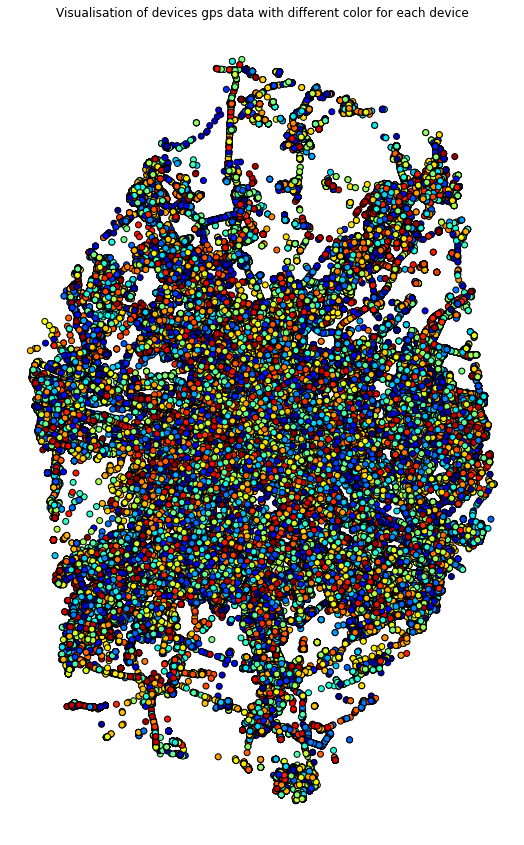

<AxesSubplot:title={'center':'Visualisation of devices gps data with different color for each device'}>

In [0]:
import matplotlib.pyplot as plt 

fig , ax = plt.subplots(figsize=(10,15))
ax.axis("off")
ax.set_title('Visualisation of devices gps data with different color for each device')

gps_geopandas_df.plot(ax=ax , cmap='jet' , edgecolor='black' , column='device_id')

In [0]:
# The Berlin map was downloaded from the following website : 
# https://www.suche-postleitzahl.org/berlin.13f
# Afterwards the file was uploaded to the s3 bucket .

dbutils.fs.cp("s3a://train-data-20221903/Berlin_map_data/plz_5-stellig_berlin.kml", "file:/tmp/plz_5-stellig_berlin.kml", recurse = True)
berlin_map = gpd.read_file("file:/tmp/plz_5-stellig_berlin.kml", driver='KML')


Out[37]:

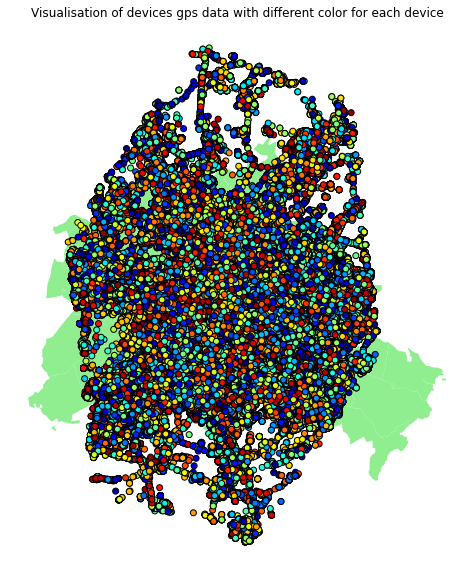

<AxesSubplot:title={'center':'Visualisation of devices gps data with different color for each device'}>

In [0]:
berlin_map.crs = 4326
ax = berlin_map.plot(color = 'lightgreen' , figsize=(10,10))
ax.axis("off")

ax.set_title('Visualisation of devices gps data with different color for each device')

gps_geopandas_df.plot(ax=ax , cmap='jet' , edgecolor='black' , column='device_id')

Out[34]:

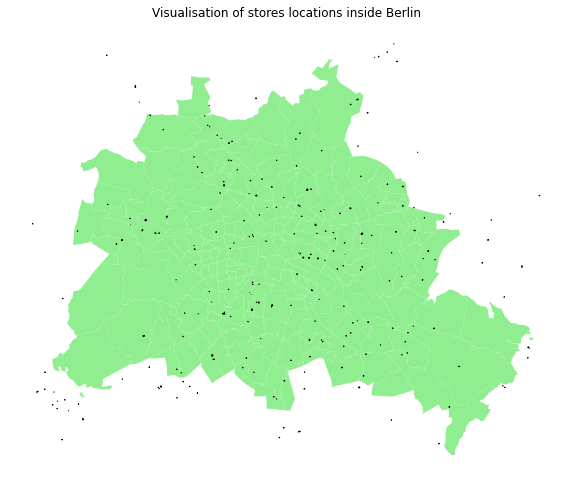

<AxesSubplot:title={'center':'Visualisation of stores locations inside Berlin'}>

In [0]:
berlin_map.crs = 4326
ax = berlin_map.plot(color = 'lightgreen' , figsize=(10,15))
ax.axis("off")
ax.set_title('Visualisation of stores locations inside Berlin')

stores_geopandas_df.plot(ax=ax , cmap='jet' , edgecolor='black' , column='store_name')